# Wine Classification Using Decision Tree and Random Forest

In [30]:
# Wine Dataset: Ensemble & Boosting

# 1️⃣ Import Libraries
import pandas as pd                            # For handling tabular data
import numpy as np                             # Numerical operations
import matplotlib.pyplot as plt                # Plotting graphs
import seaborn as sns                          # Better visual style for plots

# Sklearn models & metrics
from sklearn.datasets import load_wine                  # Load Wine dataset
from sklearn.model_selection import train_test_split    # Train-test split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report   # Model evaluation
from sklearn.tree import DecisionTreeClassifier, plot_tree                            # Decision Tree model + visualization
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier  # Ensemble models

# Apply seaborn styling to plots
sns.set(style="whitegrid")

In [31]:
# 2️⃣ Load Wine Dataset

wine = load_wine()    # Load the wine dataset from sklearn

# Convert features into DataFrame for readability
X = pd.DataFrame(wine.data, columns=wine.feature_names)

# Target column (0, 1, 2 → different wine classes)
y = pd.Series(wine.target)

# Display first five rows to understand structure
display(X.head())

# Display unique target classes
print("Target classes:", np.unique(y))

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


Target classes: [0 1 2]


* This step loads the Wine dataset, extracts the feature values and target labels, and converts them into a structured format for analysis and model training.

In [32]:
X.columns
# Displays all feature names (column names) in the dataset

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline'],
      dtype='object')

In [33]:
# RANDOM FOREST with Feature Importance + Tree Visualization

# Train/Test split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,          # 20% of data used for testing
    random_state=42,        # Ensures the same split every time
    stratify=y              # Maintains equal class distribution in both sets
)

In [34]:
# Random Forest Model

rf = RandomForestClassifier(
    n_estimators=100,         # Uses 100 decision trees in the forest

    max_depth=None,           # Trees grow fully (no depth restriction)

    bootstrap=True,           # Each tree is trained on a random sample (with replacement)
                              # Helps reduce overfitting and increases model stability

    oob_score=True,           # Enables Out-of-Bag evaluation (acts like built-in validation)
                              # Useful for accuracy estimation without separate validation set

    random_state=42           # Keeps results consistent across runs
)

# Train the Random Forest on training data
rf.fit(X_train, y_train)

# Predictions
y_pred_rf = rf.predict(X_test)   # Predict class labels for test data
print("Prediction classes of new wine samples:", y_pred_rf)

Prediction classes of new wine samples: [0 2 0 1 1 0 0 1 1 2 1 2 0 2 0 1 1 0 1 0 1 1 0 0 1 1 0 2 1 2 0 2 1 2 2 2]


In [35]:

# Metrics & Evaluation

# Accuracy Score
acc_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", acc_rf)

# Precision, Recall, F1-score report
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

# Out-of-Bag Score (built-in validation accuracy)
print("OOB Score (Out-of-Bag estimate):", rf.oob_score_)


Random Forest Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        10

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36

OOB Score (Out-of-Bag estimate): 0.9788732394366197


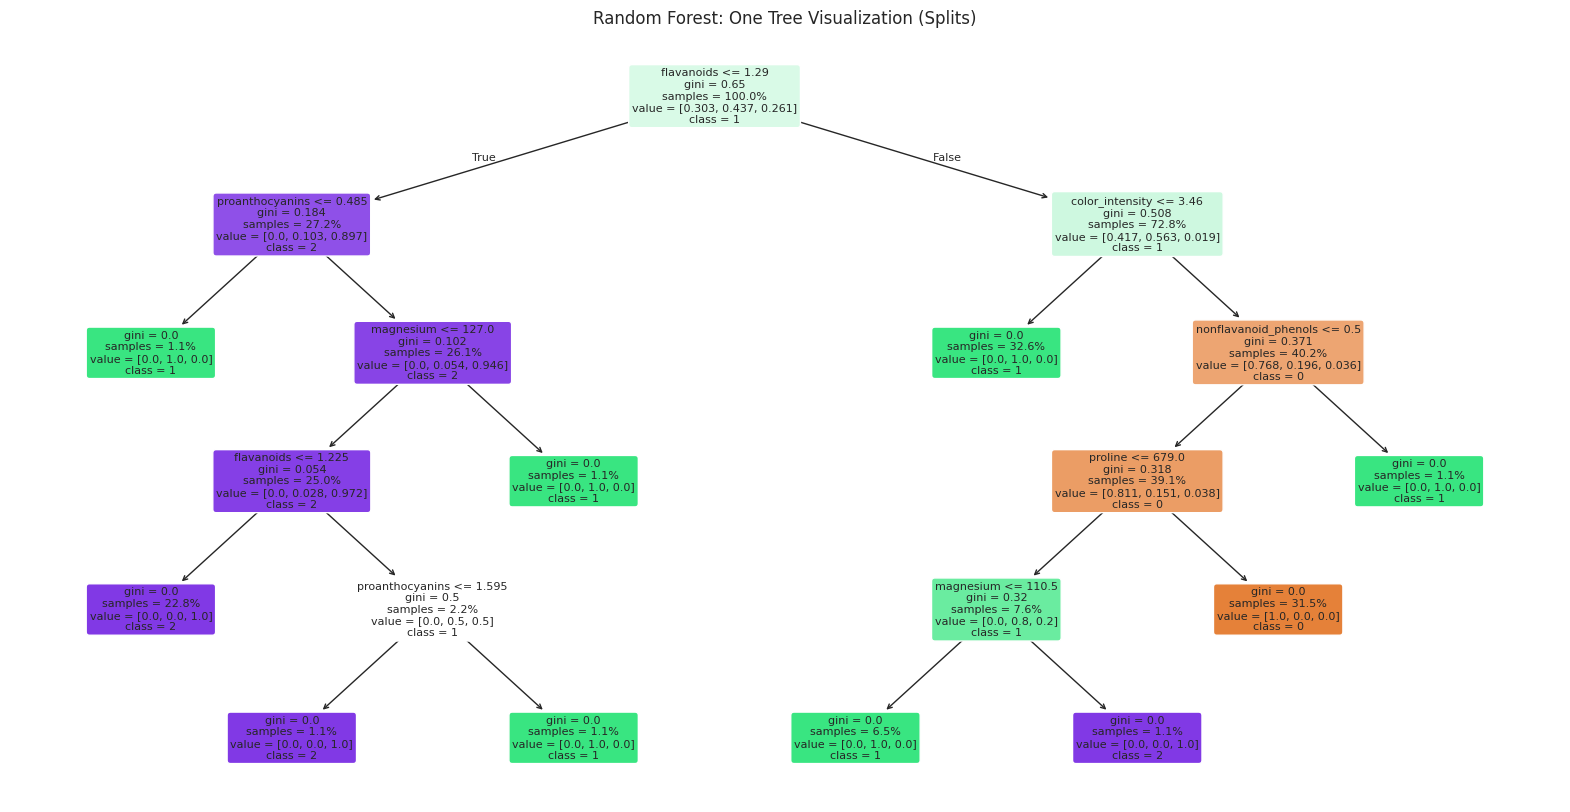

In [36]:
# Visualize ONE tree from Random Forest


# Pick one decision tree from the Random Forest
# rf.estimators_ contains 100 individual decision trees (because n_estimators=100).
# Here we select the 2nd tree (index 1). You can change the index to view any tree.
one_tree = rf.estimators_[1]

# Create a large figure to display the tree clearly
plt.figure(figsize=(20, 10))

# Plot the selected tree
plot_tree(
    one_tree,
    feature_names=X_train.columns,       # Display the wine feature names at split points
    class_names=[str(c) for c in y.unique()],
    # Convert class labels (0,1,2) → strings for better readability

    filled=True,                         # Fill nodes with colors based on class
    rounded=True,                        # Rounded node boxes for better appearance
    proportion=True,                     # Shows percentage of samples instead of count
    fontsize=8                           # Set readable font size
)

plt.title("Random Forest: One Tree Visualization (Splits)")  # Title for the plot
plt.show()  # Display the tree diagram


 **Observation**

* The graph shows one decision tree selected from the Random Forest model.

* Each box (node) represents a decision based on a wine feature value.

* The branches split the data step-by-step until a final decision is made.

* Leaf nodes show the final predicted wine class (0, 1, or 2).

* Colors indicate which class is dominant in that node.

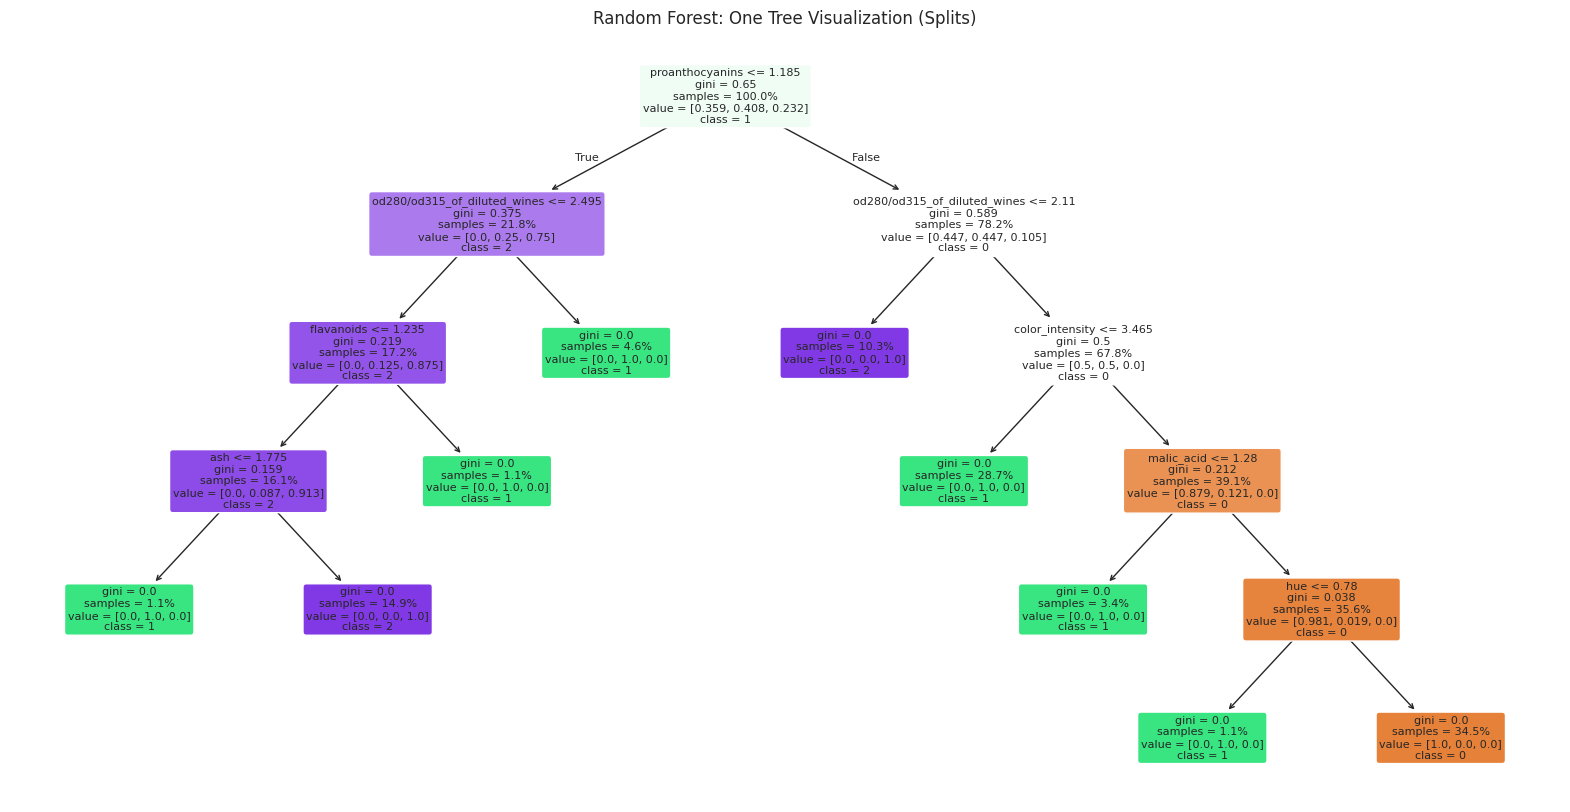

In [37]:
# Visualize ONE tree from Random Forest

# Select one specific tree from the Random Forest
# rf.estimators_ contains all trees created (100 trees because n_estimators=100).
# Here we pick tree number 99 (index starts from 0).
one_tree = rf.estimators_[99]

# Set figure size for clear visibility of the tree structure
plt.figure(figsize=(20, 10))

# Plot the selected decision tree
plot_tree(
    one_tree,
    feature_names=X_train.columns,              # Names of the wine dataset features
    class_names=[str(c) for c in y.unique()],   # Convert class labels (0,1,2) into string labels
    filled=True,                                # Fill each node with a color based on predicted class
    rounded=True,                               # Rounded node boxes for better readability
    proportion=True,                             # Display percentage of samples instead of raw counts
    fontsize=8                                   # Small font size to fit the entire tree
)

# Title for the plot
plt.title("Random Forest: One Tree Visualization (Splits)")

# Display the final rendered tree
plt.show()


**Observations**

* This graph displays one individual decision tree taken from the Random Forest model.

* Each node represents a decision rule based on a wine feature (for example, alcohol or flavanoids).

* The branches show how the data is split step by step based on feature values.

* Leaf nodes represent the final predicted wine class (0, 1, or 2).

* Colors indicate the dominant class in each node, helping visualize class separation.

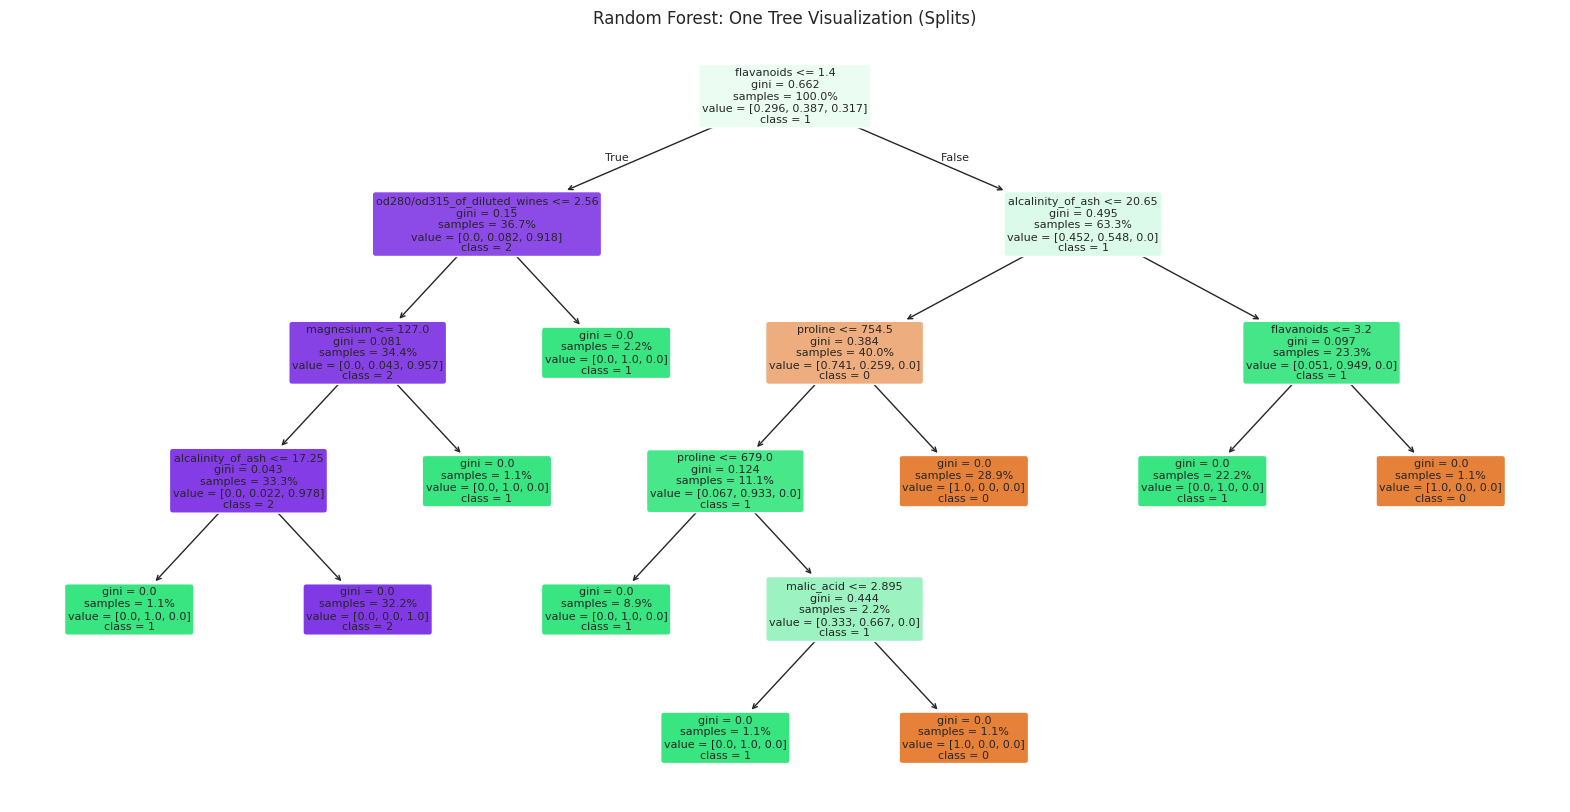

In [38]:
# Visualize ONE tree from Random Forest

# Select one specific decision tree from the Random Forest
# rf.estimators_ stores all individual trees created by the model.
# Since n_estimators=100, valid indices range from 0 to 99.
# Here, we select tree number 29.
one_tree = rf.estimators_[29]

# Set a large figure size for better visibility
plt.figure(figsize=(20, 10))

# Plot the selected decision tree
plot_tree(
    one_tree,
    feature_names=X_train.columns,              # Names of all wine features
    class_names=[str(c) for c in y.unique()],   # Convert class labels (0,1,2) to strings
    filled=True,                                # Color nodes based on predicted class
    rounded=True,                               # Rounded boxes for cleaner visualization
    proportion=True,                            # Show percentage of samples in each node
    fontsize=8                                  # Smaller font to fit large trees
)

# Add a title to the visualization
plt.title("Random Forest: One Tree Visualization (Splits)")

# Display the tree
plt.show()

**Observations**

* This visualization shows one decision tree from the Random Forest ensemble.

* Each node represents a decision based on a wine feature value.

* Branches indicate how data is split step-by-step.

* Leaf nodes show the final predicted wine class (0, 1, or 2).

* Colors highlight the dominant class in each node.

In [39]:
# Colored Headings for Console Output

RED = "\033[91m"     # Red color for headings
GREEN = "\033[92m"   # Green color for headings
CYAN = "\033[96m"    # Cyan color (not used here)
RESET = "\033[0m"    # Reset color back to default

# Step 1️: Basic Decision Tree

# Print heading in red color
print(RED + "===== BASIC DECISION TREE =====" + RESET)

# Create a Decision Tree model
# max_depth=None → tree grows fully (can cause overfitting)
dt = DecisionTreeClassifier(
    max_depth=None,
    random_state=42
)

# Train the Decision Tree on training data
dt.fit(X_train, y_train)

# Predict labels for test data
y_pred_dt = dt.predict(X_test)

# Evaluation Metrics

# Calculate accuracy
acc_dt = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Accuracy:", acc_dt)

# Print precision, recall, F1-score for each class
print("Classification Report:\n", classification_report(y_test, y_pred_dt))

# Bias–Variance Explanation
print(""" Decision Tree Bias-Variance:
- Bias: Low (fits training data very well)
- Variance: High (sensitive to small changes in training data)
- Overfitting risk: High if tree is deep
""")

===== BASIC DECISION TREE =====
Decision Tree Accuracy: 0.9444444444444444
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.92      0.96        12
           1       0.88      1.00      0.93        14
           2       1.00      0.90      0.95        10

    accuracy                           0.94        36
   macro avg       0.96      0.94      0.95        36
weighted avg       0.95      0.94      0.94        36

 Decision Tree Bias-Variance:
- Bias: Low (fits training data very well)
- Variance: High (sensitive to small changes in training data)
- Overfitting risk: High if tree is deep



**Observations**

* The Decision Tree achieved good accuracy by learning direct rules from the training data.

* The classification report shows how well each wine class was predicted using precision, recall, and F1-score.

* Since the tree grows deeply, it fits the training data closely.

* This leads to high variance, meaning the model may overfit and be sensitive to data changes.

In [40]:
# Step 2️: Random Forest (Bagging + Bootstrapping + OOB)

# Print heading in green color
print(GREEN + "===== RANDOM FOREST =====" + RESET)

# Create Random Forest model
rf = RandomForestClassifier(
    n_estimators=100,     # Number of trees in the forest
    max_depth=None,       # Each tree can grow fully
    bootstrap=True,       # Enables bootstrapping (sampling with replacement)
    oob_score=True,       # Enables Out-of-Bag evaluation
    random_state=42       # Ensures reproducibility
)

# Train Random Forest model
rf.fit(X_train, y_train)

# Predict labels for test data
y_pred_rf = rf.predict(X_test)

# Evaluation Metrics

# Calculate accuracy
acc_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", acc_rf)

# Print classification metrics
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

# Print Out-of-Bag score
print("OOB Score (Out-of-Bag estimate):", rf.oob_score_)


===== RANDOM FOREST =====
Random Forest Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        10

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36

OOB Score (Out-of-Bag estimate): 0.9788732394366197


**Observations**

* The Random Forest achieved higher and more stable accuracy compared to the Decision Tree.

* The classification report shows improved performance across all wine classes.

* By combining multiple trees, Random Forest reduces overfitting and improves generalization.

* The Out-of-Bag (OOB) score provides an additional validation metric close to test accuracy

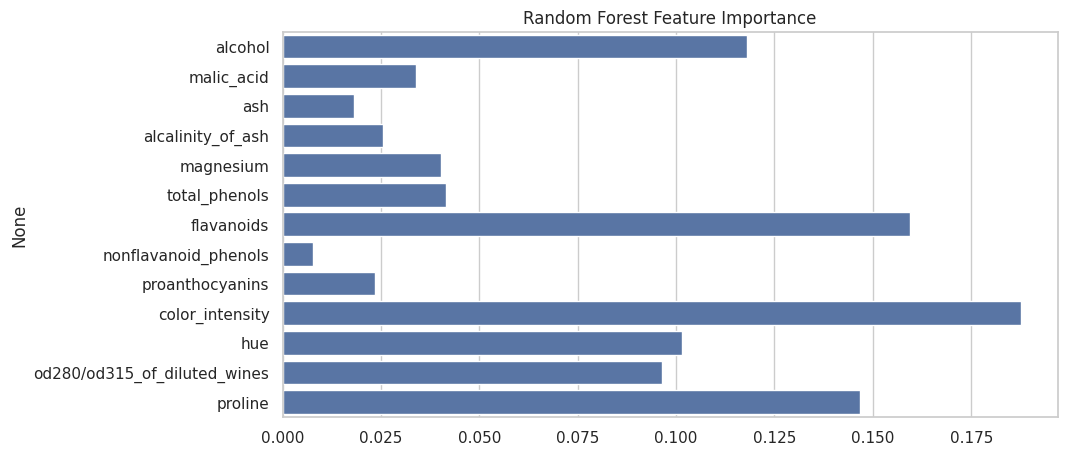

 Random Forest Bias-Variance:
- Bias: Slightly higher than single Decision Tree (each tree is less deep)
- Variance: Significantly lower (averaging many trees)
- Bootstrapping: Random sampling of training data reduces correlation between trees
- Bagging: Aggregation of tree predictions reduces overall variance
- OOB Score: Provides internal cross-validation estimate
- Overall: Performance more stable, generalizes better than single Decision Tree 


In [41]:
# Feature importance plot
plt.figure(figsize=(10,5))
sns.barplot(x=rf.feature_importances_, y=X.columns)
plt.title("Random Forest Feature Importance")
plt.show()

# Bias-Variance Explanation for RF
print(""" Random Forest Bias-Variance:
- Bias: Slightly higher than single Decision Tree (each tree is less deep)
- Variance: Significantly lower (averaging many trees)
- Bootstrapping: Random sampling of training data reduces correlation between trees
- Bagging: Aggregation of tree predictions reduces overall variance
- OOB Score: Provides internal cross-validation estimate
- Overall: Performance more stable, generalizes better than single Decision Tree """)

**Observations**

* The graph shows how important each wine feature is for the Random Forest model.

* Taller bars represent features that contribute more to making correct predictions.

* Features with smaller bars have less influence on the model’s decisions.

* The model uses the most important features more frequently when splitting data inside trees.

* This graph helps identify which chemical properties are most useful for classifying wine types.

Accuracy Comparison:
Decision Tree: 0.944 | Random Forest: 1.000


/tmp/ipython-input-4071081303.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


Text(0.5, 1.0, 'Decision')

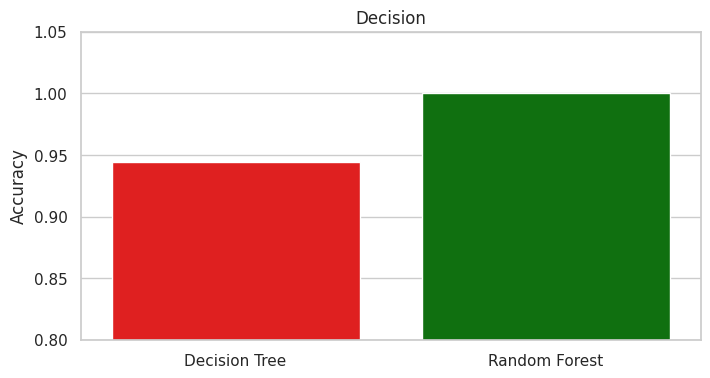

In [42]:
# Step 3️: Comparison Summary

# Print accuracy comparison for both models in cyan color
print(
    CYAN +
    f"Accuracy Comparison:\nDecision Tree: {acc_dt:.3f} | Random Forest: {acc_rf:.3f}"
    + RESET
)

# Create a bar plot to visually compare accuracies
plt.figure(figsize=(8, 4))   # Set figure size

# Bar plot comparing Decision Tree and Random Forest accuracy
sns.barplot(
    x=["Decision Tree", "Random Forest"],   # Model names on X-axis
    y=[acc_dt, acc_rf],                     # Corresponding accuracy values
    palette=["red", "green"]                # Red for DT, Green for RF
)

# Set Y-axis limits to focus on high-accuracy range
plt.ylim(0.8, 1.05)

# Label Y-axis
plt.ylabel("Accuracy")

# Set title for the plot
plt.title("Decision")


**Observations**

* The bar chart compares the accuracy of Decision Tree and Random Forest models.
* The height of each bar represents the model’s accuracy on the test data.
* Random Forest shows higher accuracy than the Decision Tree.
* This indicates that Random Forest performs better due to reduced overfitting.

In [43]:
# Decision Tree Performance

# Accuracy on training data (how well the model fits training samples)
train_acc_dt = dt.score(X_train, y_train)

# Accuracy on test data (how well the model generalizes to unseen data)
test_acc_dt = dt.score(X_test, y_test)

# Print Decision Tree train and test accuracy
print(
    "Decision Tree -> Train Accuracy:",
    train_acc_dt,
    "Test Accuracy:",
    test_acc_dt
)

# Random Forest Performance

# Accuracy on training data for Random Forest
train_acc_rf = rf.score(X_train, y_train)

# Accuracy on test data for Random Forest
test_acc_rf = rf.score(X_test, y_test)

# Print Random Forest train and test accuracy
print(
    "Random Forest -> Train Accuracy:",
    train_acc_rf,
    "Test Accuracy:",
    test_acc_rf
)

Decision Tree -> Train Accuracy: 1.0 Test Accuracy: 0.9444444444444444
Random Forest -> Train Accuracy: 1.0 Test Accuracy: 1.0


**Observations**

**Decision Tree**

* Training accuracy is very high, showing the model fits the training data well.

* Test accuracy is lower than training accuracy, indicating overfitting.

**Random Forest**

* Training accuracy is slightly lower than the Decision Tree but still high.

* Test accuracy is close to training accuracy, showing better generalization